<a href="https://colab.research.google.com/github/jocelynbaduria/Assignment-4_part_1_2/blob/main/Jocelyn_Baduria_Assignment_4_part_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1. 
The assignment is to implement MNIST classifier fully with all the things learnt in last class with many features in numpy in a colab (executed colab should be checked in github and github directory with all resources should be provided)

Check Grokking deep learning book 
Sample code :  https://github.com/iamtrask/Grokking-Deep-Learning (Links to an external site.) chapter 7,8,9.  - use mini batch, dropout, learning rate etc.,. 

The code should be very well documented in colab with appropriate sections and should be clean and easy to understand (points will be taken away if the code is not properly commented in colab). 
NOTE: this is individual assignment. we will check if two students are giving identical homework with turnitin as well as global check of copy paste as well. Please ensure you do this homework from scratch and not copy paste. 


In [20]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.2MB/s 
     |████████████████████████████████| 194kB 10.4MB/s 
     |████████████████████████████████| 1.2MB 14.4MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 40.5MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


### Load MNIST Dataset Using Numpy Array and/or Tensors


In [24]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [25]:
path = untar_data(URLs.MNIST_SAMPLE)

In [27]:
Path.BASE_PATH = path 

In [28]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

Using the fastai MNIST dataset follows a common layout for machine learning datasets: Folders are separated for the training set and the validation set (and/or test set). 

In [29]:
# Let's check what's inside the MNIST training set: Using the fastai ls command lets execute it.
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In this MNIST sample dataset we are using only the 3s and 7s.  3 and 7 are the labels in this dataset.

In [31]:
# Let's check each 3s and 7s folders (using sorted to ensure we all get the same order of files):
three = (path/'train'/'3').ls().sorted()
seven = (path/'train'/'7').ls().sorted()
three

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

Let’s check an image of a handwritten number 3, from the famous MNIST dataset of handwritten numbers:

In [33]:
# Select one sample from the dataset
image3_path = three[1]
image3 = Image.open(image3_path)
image3

The image class from the Python Imaging Library (PIL) was used in this tutorial. PIL is the most widely used Python package for opening, manipulating, and viewing images so it displays the image for us automatically.

In [34]:
# In a computer, everything is represented as a number. To view the numbers that make up this image, 
# we have to convert it to a NumPy array or a PyTorch tensor. 
# For instance, here's what a section of the image looks like, converted to a NumPy array:
array(image3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

We can slice the array to pick just the part with the top of the digit in it, and then use a Pandas DataFrame to color-code the values using a gradient, which shows us clearly how the image is created from the pixel values:

In [40]:
image3_t = array(image3)
df = pd.DataFrame(image3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


### Create a model MNIST classifier that can recognize 3s and 7s with a MINI Batch Gradient Descent. 

In [43]:
# Step one for our simple model is to get the average of pixel values for each of our two groups using numpy array.
seven_array = [array(Image.open(o)) for o in seven]
three_array = [array(Image.open(o)) for o in three]
len(three_array),len(seven_array)

(6131, 6265)

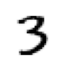

In [44]:
show_image(three_array[1]);

Convert numpy array to tensor to stack the 3s and 7s sample dataset

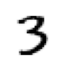

In [53]:
# Convert Numpy -> PyTorch
seven_tensor = [tensor(Image.open(o)) for o in seven]
three_tensor = [tensor(Image.open(o)) for o in three]
len(three_tensor),len(seven_tensor)
show_image(three_tensor[1]);

The most important attribute of a tensor is its shape. Tensor is similar to numpy array, it shows  the length of each axis. In this sample, we can see that we have 6,131 images, each of size 28×28 pixels. 

A NumPy array is a multidimensional table of data, with all items of the same type. Since that can be any type at all, they can even be arrays of arrays, with the innermost arrays potentially being different sizes—this is called a "jagged array." By "multidimensional table" we mean, for instance, a list (dimension of one), a table or matrix (dimension of two), a "table of tables" or "cube" (dimension of three), and so forth.


A PyTorch tensor is nearly the same thing as a NumPy array, but with an additional restriction that unlocks some additional capabilities. However, the restriction is that a tensor cannot use just any old type—it has to use a single basic numeric type for all components. For example, a PyTorch tensor cannot be jagged. It is always a regularly shaped multidimensional rectangular structure.

The vast majority of methods and operators supported by NumPy on these structures are also supported by PyTorch, but PyTorch tensors have additional capabilities. One major capability is that these structures can live on the GPU, in which case their computation will be optimized for the GPU and can run much faster (given lots of values to work on).

In [61]:
# Stacked the sample dataset
stacked_sevens = torch.stack(seven_tensor).float()/255
stacked_threes = torch.stack(three_tensor).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [62]:
len(stacked_threes.shape)

3

In [63]:
# We can also get a tensor's rank directly with ndim:
stacked_threes.ndim

3

Calculate the mean of all the image tensors by computing the mean along dimension 0 of our stacked, rank-3 tensor.

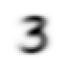

In [64]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

### A. The code should do mini batch gradient descent along with appropriate learning rate.

Pick appropriate batch size for minibatch (read fastai and other tips and https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6 (Links to an external site.) for example.) see sample https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/ (Links to an external site.) as well.

We can calculate the average loss for a few dataset items at a time. This is known as mini-batch and the number of data items in the mini-batch is called the batch size. Choosing a good batch size is one of the decisions you need to make as a deep learning practitioner to train your model quickly and accurately.

Fastai and Pytorch provide Dataloader that will do the shuffling and mini-batch collation. A Dataloader can use any Python collection and make it into an iterator over many batches.